### Planetary motion

We have $\vec{p} = [v_x,v_y,x,y]^T $

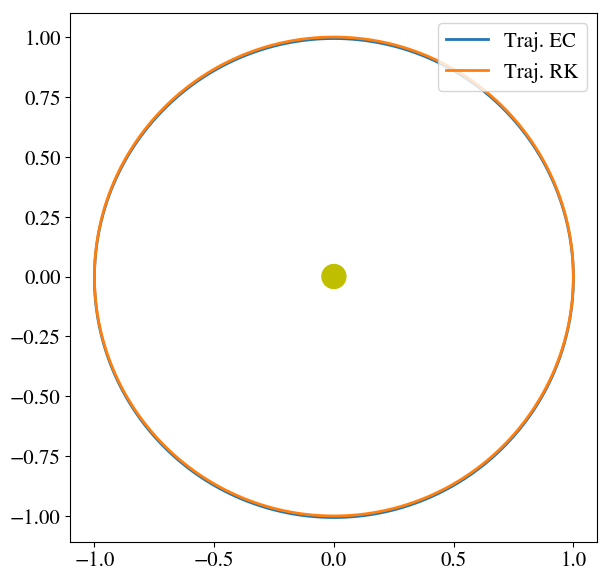

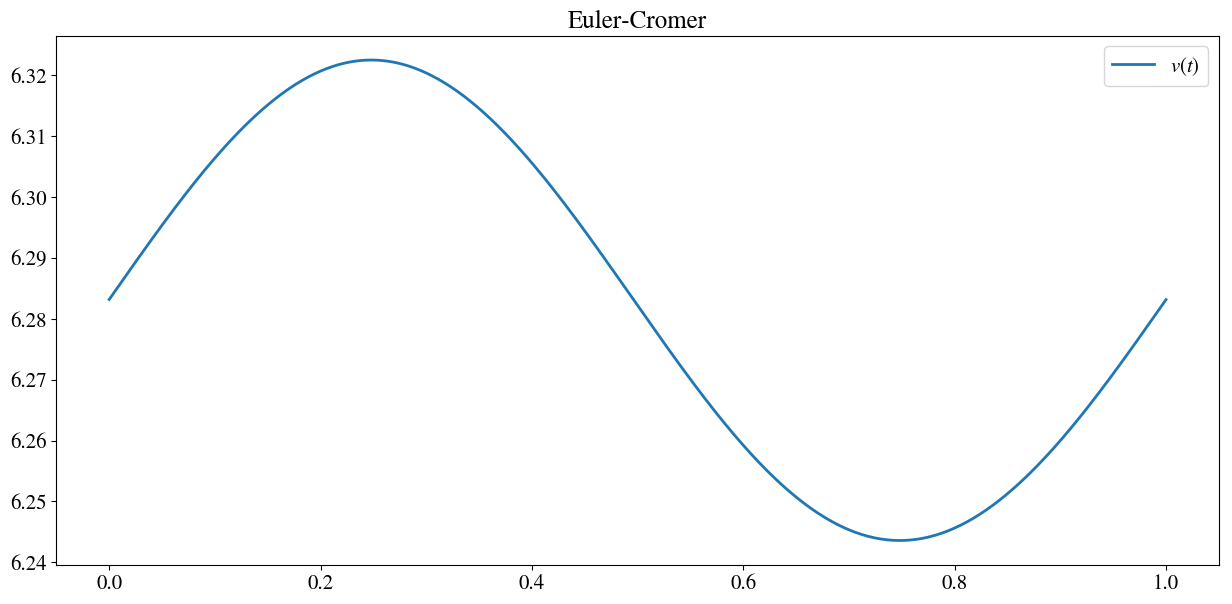

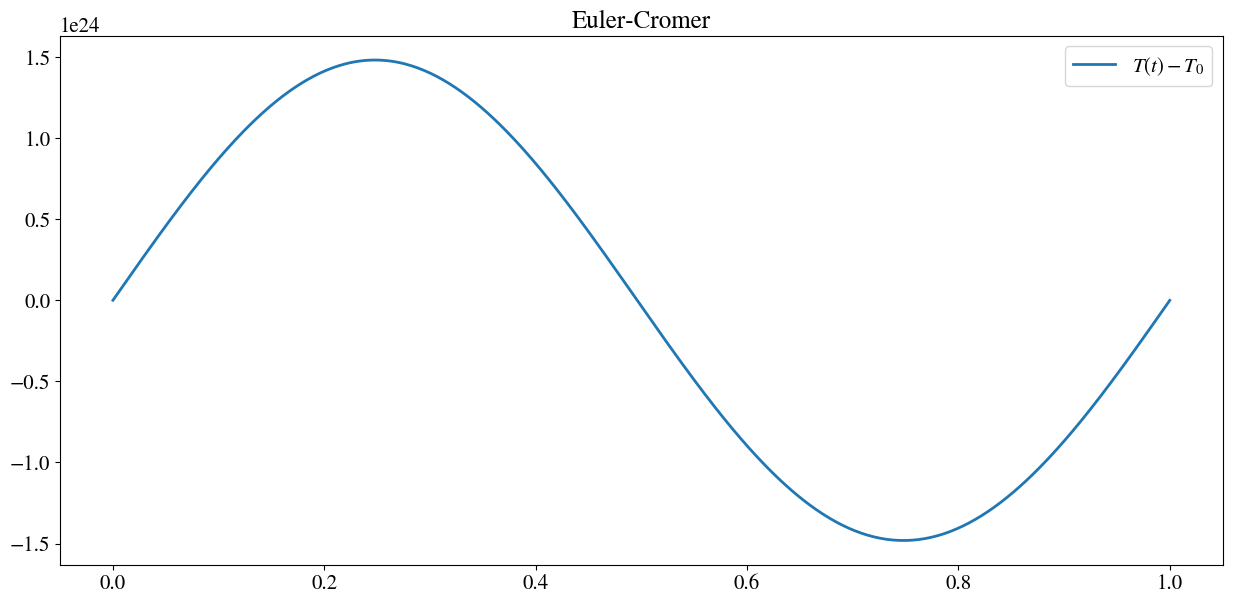

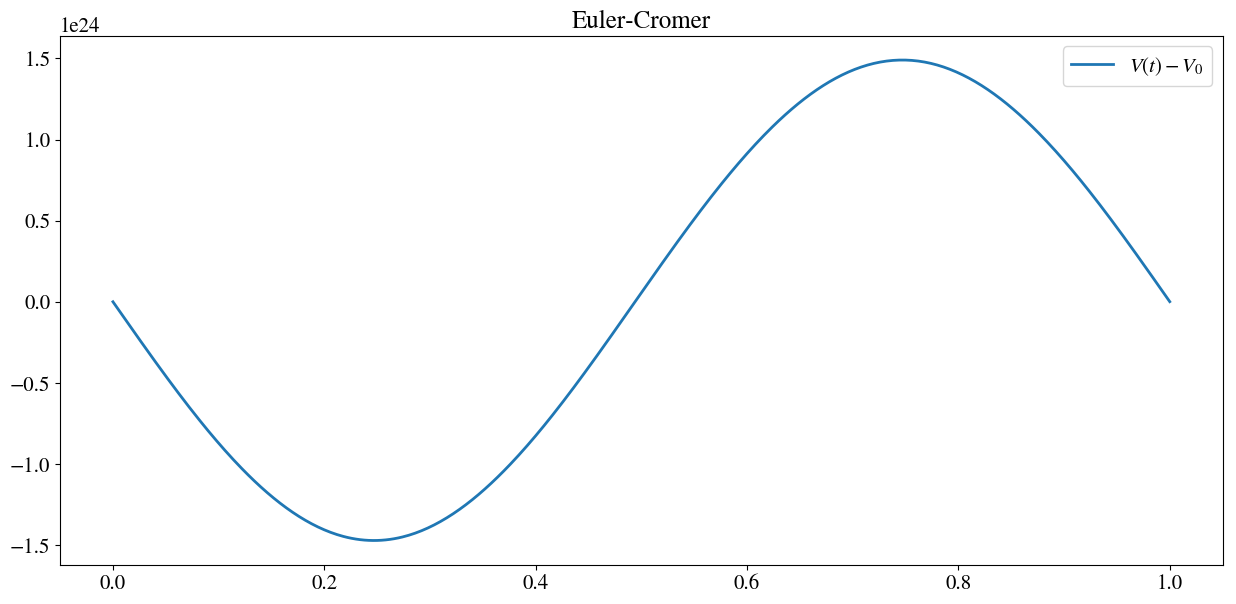

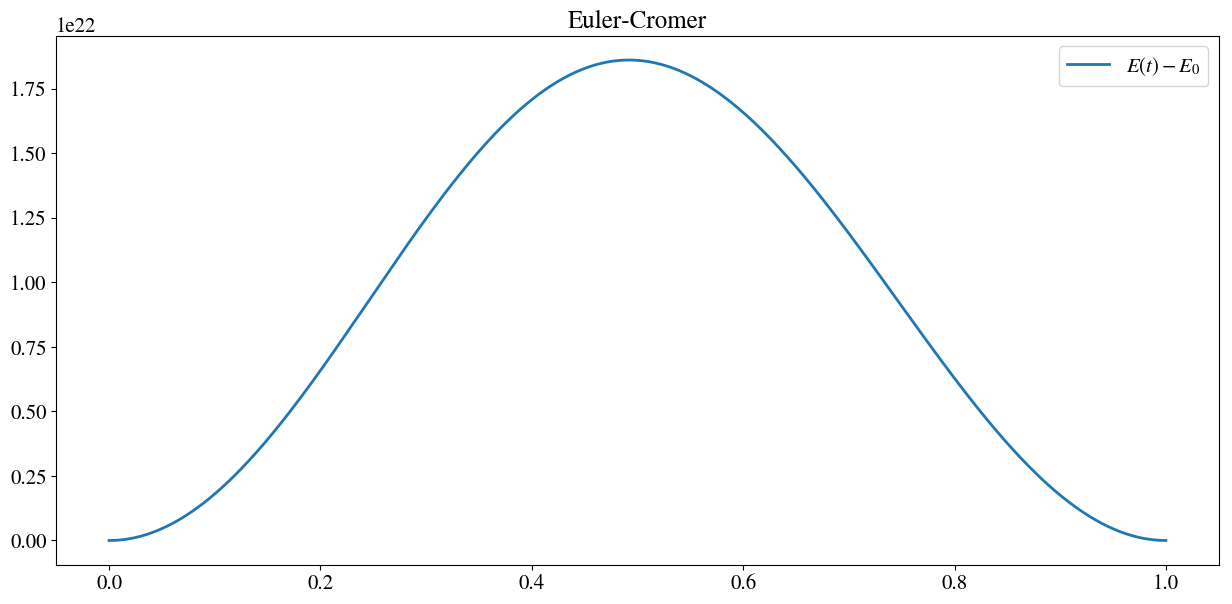

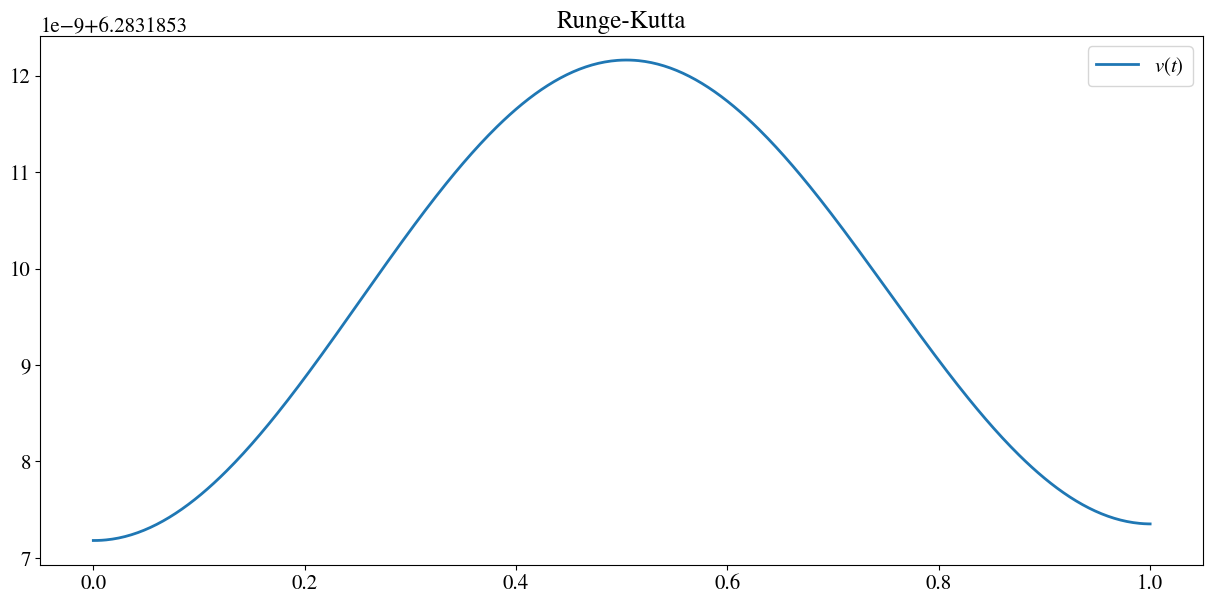

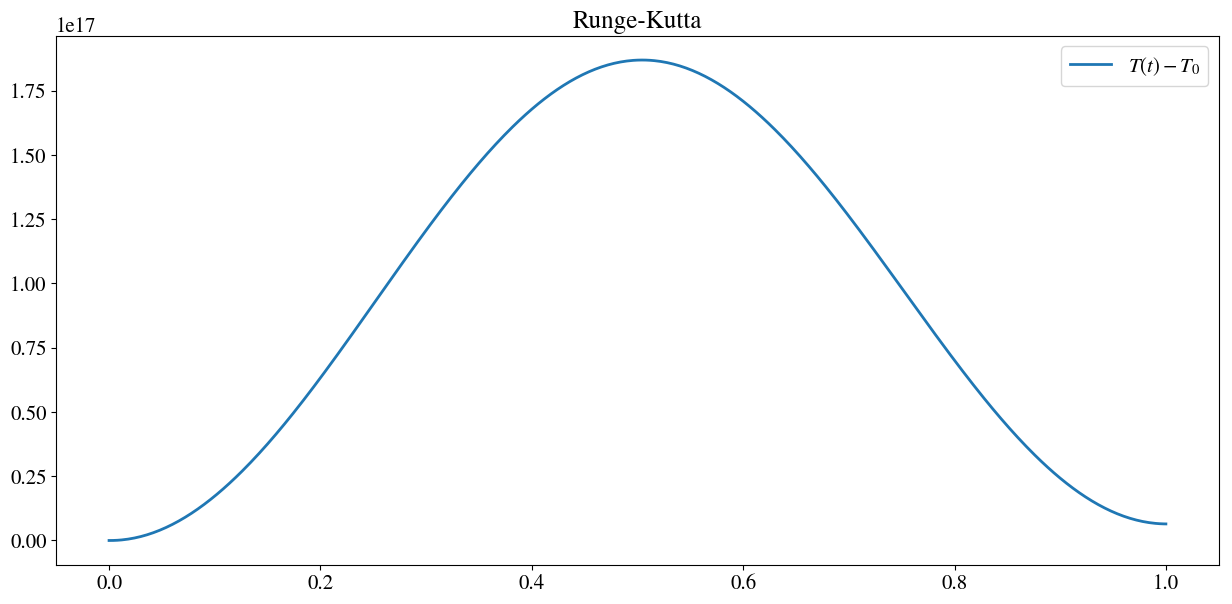

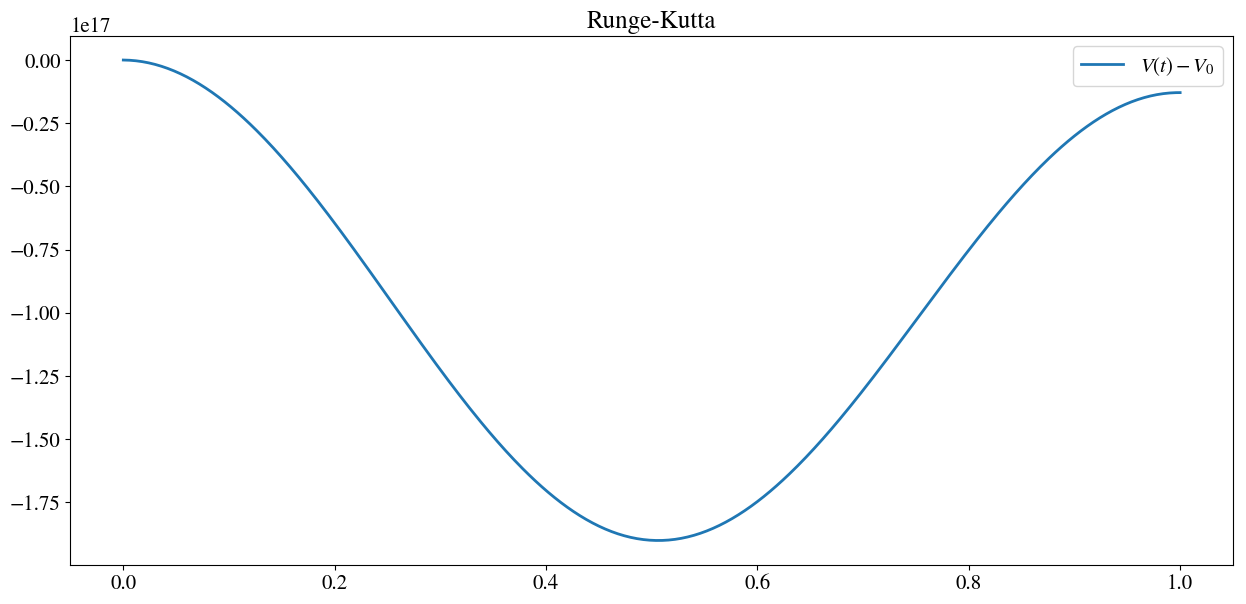

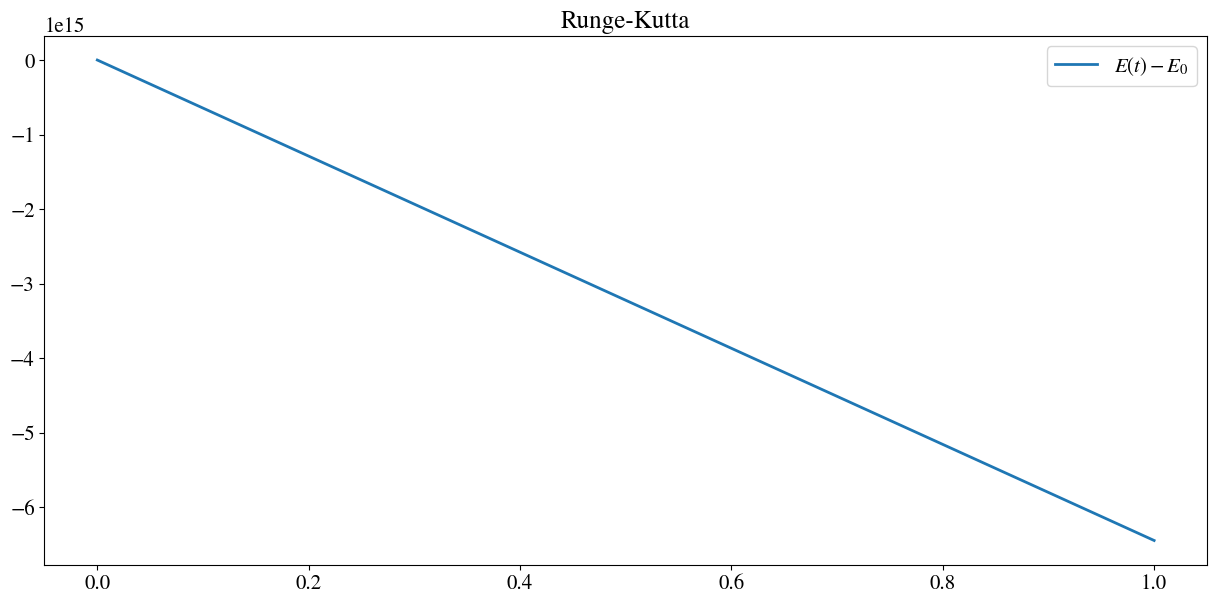

In [2]:
import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (15, 7), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 100}
plt.rcParams.update(newparams)

# p vektor = [v_x, v_y, x, y]
# tau = skrittlengde
# p' = f(p)
def f(p):
    return np.array([-4*np.pi**2*p[2]*(p[2]**2+p[3]**2)**(-1.5),-4*np.pi**2*p[3]*(p[2]**2+p[3]**2)**(-1.5),p[0],p[1]])

def step_Euler(p, tau, f):  
    return p + tau*f(p) 

def step_Euler_Cromer(p, tau, f):
    p1 = step_Euler(p,tau,f)
    p2 = step_Euler(np.concatenate((p1[:2],p[2:])),tau,f)
    return np.concatenate((p1[:2],p2[2:]))

def step_RK(p, tau, f):  
    k1 = f(p)
    k2 = f(p + (tau / 2) * k1)  
    k3 = f(p + (tau / 2) * k2) 
    k4 = f(p + tau * k3) 
    return p + (tau / 6) * (k1 + (2 * k2) + (2 * k3) + k4)


def solve_ODE(t_0, p_0, t_end, tau, f, method):
    N = int((t_end-t_0)/tau)
    Times = np.linspace(t_0,t_end,N+1)
    P = np.zeros((N+1,len(p_0)))  # N+1 x 4 matrise
    P[0] = p_0
    for i in range(N):
        P[i+1] = method(P[i], tau, f)
    return Times, P

tau = 0.002
t_0 = 0
t_end = 1
p_0 = np.array([0,2*np.pi,1,0])
Times_EC, P_EC = solve_ODE(t_0, p_0, t_end, tau, f, step_Euler_Cromer)
Times_RK, P_RK = solve_ODE(t_0, p_0, t_end, tau, f, step_RK)

#plt.grid(linestyle='--')
circle1 = plt.Circle((0, 0), 0.05, color='y')
fig, ax = plt.subplots()

ax.set_aspect(1)
ax.add_artist(circle1)
plt.plot(P_EC[:,2],P_EC[:,3],label="Traj. EC")
plt.plot(P_RK[:,2],P_RK[:,3], label="Traj. RK")
plt.legend(loc='upper right')
plt.show()

M_e = 5.97*1e+24
def get_Energies(Times, P):
    N = len(P[:,0])
    T = np.zeros(N)
    V = np.zeros(N)
    E = np.zeros(N)
    for i in range(N):
        T[i] = 0.5*M_e*(P[i,0]**2+P[i,1]**2)
        V[i] = -(4*M_e*np.pi**2)/np.sqrt(P[i,2]**2+P[i,3]**2)
        E[i] = T[i] + V[i]
    return T, V, E


T_EC, V_EC, E_EC = get_Energies(Times_EC, P_EC)
T_RK, V_RK, E_RK = get_Energies(Times_RK, P_RK)       

## Kan lage subplots her så ser det bra ut
plt.plot(Times_EC,np.sqrt(2*T_EC/M_e),label=r"$v(t)$")  #v = sqrt(2*T/m)
plt.title("Euler-Cromer")
plt.legend()
plt.show()
plt.plot(Times_EC,T_EC-T_EC[0],label=r"$T(t)-T_0$")
plt.title("Euler-Cromer")
plt.legend()
plt.show()
plt.plot(Times_EC,V_EC-V_EC[0],label=r"$V(t)-V_0$")
plt.title("Euler-Cromer")
plt.legend()
plt.show()
plt.plot(Times_EC,E_EC-E_EC[0],label=r"$E(t)-E_0$")
plt.title("Euler-Cromer")
plt.legend()
plt.show()

plt.plot(Times_RK,np.sqrt(2*T_RK/M_e),label=r"$v(t)$")  #v = sqrt(2*T/m)
plt.title("Runge-Kutta")
plt.legend()
plt.show()
plt.plot(Times_RK,T_RK-T_RK[0],label=r"$T(t)-T_0$")
plt.title("Runge-Kutta")
plt.legend()
plt.show()
plt.plot(Times_RK,V_RK-V_RK[0],label=r"$V(t)-V_0$")
plt.title("Runge-Kutta")
plt.legend(loc="upper right")
plt.show()
plt.plot(Times_RK,E_RK-E_RK[0],label=r"$E(t)-E_0$")
plt.title("Runge-Kutta")
plt.legend()
plt.show()


We can see that with the Euler-Cromer method the change in energy $E(t)-E_0$ is of order 10^22 while with the Runge-Kutta method we have a change of order 10^15.  

### The effect of the time-step $\tau$
From the graphs below we can see that a time-step less than $\tau = 0.005$ is sufficient to get a smooth curve. The Runge-Kutta and Euler-Cromer trajectory fully coincide for smaller time-steps.

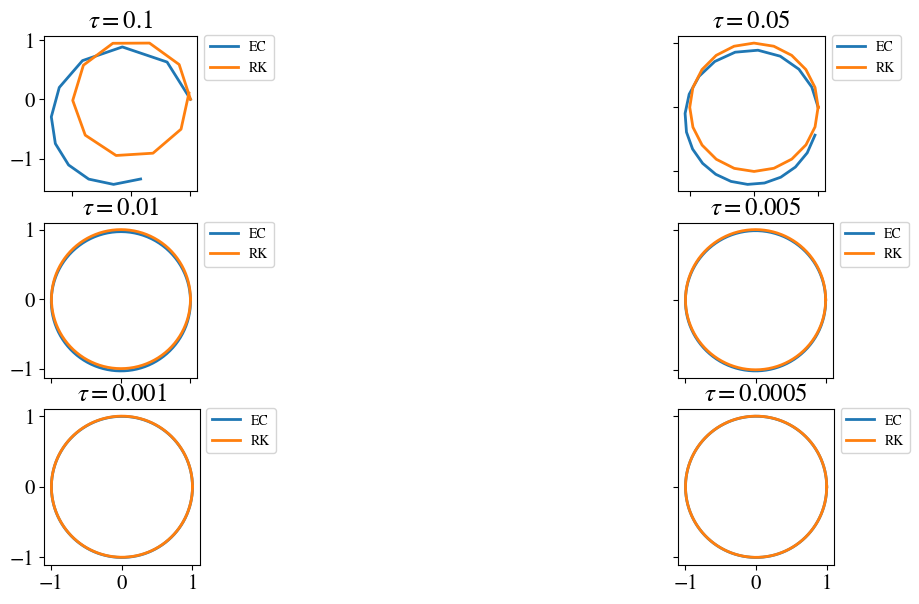

In [191]:
tau_list = [1e-1,5e-2,1e-2,5e-3,1e-3,5e-4]

fig, axs = plt.subplots(3, 2)
for i in range(len(tau_list)):
    Times_EC, P_EC = solve_ODE(t_0, p_0, t_end, tau_list[i], f, step_Euler_Cromer)
    Times_RK, P_RK = solve_ODE(t_0, p_0, t_end, tau_list[i], f, step_RK)
    
    if i % 2 == 0:
        axs[i//2,0].plot(P_EC[:,2],P_EC[:,3], label="EC")
        axs[i//2,0].plot(P_RK[:,2],P_RK[:,3], label="RK")
        axs[i//2,0].set_title(r"$\tau = $"+str(tau_list[i]))
        axs[i//2,0].set_aspect("equal", adjustable="box", anchor="W")
        axs[i//2,0].legend(bbox_to_anchor=(1,1.05),prop={'size':10})
    else:
        axs[i//2,1].plot(P_EC[:,2],P_EC[:,3], label="EC")
        axs[i//2,1].plot(P_RK[:,2],P_RK[:,3], label="RK")
        axs[i//2,1].set_title(r"$\tau = $"+str(tau_list[i]))
        axs[i//2,1].set_aspect("equal",anchor="W")
        axs[i//2,1].legend(bbox_to_anchor=(1,1.05),prop={'size':10})

for ax in axs.flat:
    ax.label_outer()
plt.show()

### The energy change as a function of the time-step $\tau$
The energy change is in this case the change in energy over one orbit, $\Delta E = E_0 - E_{end}$. The factor $\Delta E$ works as an error estimator because if we had an excact solution we would get a zero. Therefore, plotting $\Delta E$ as a function of the time-step $\tau$ will show us how fast the numerical solution is converging.

From the graphs above we see that for the Euler-Cromer method the change in energy $|\Delta E(t)| = |E(t) - E_0|$ has its maximum approximately half-way around the orbit. This is in contrast to Runge-Kutta where $|\Delta E(t)|$ increases steadily. To illustrate this there are two plots below, the first one with $\Delta E$ as described above and the second one with $E_{end} = E_{halfway}$.

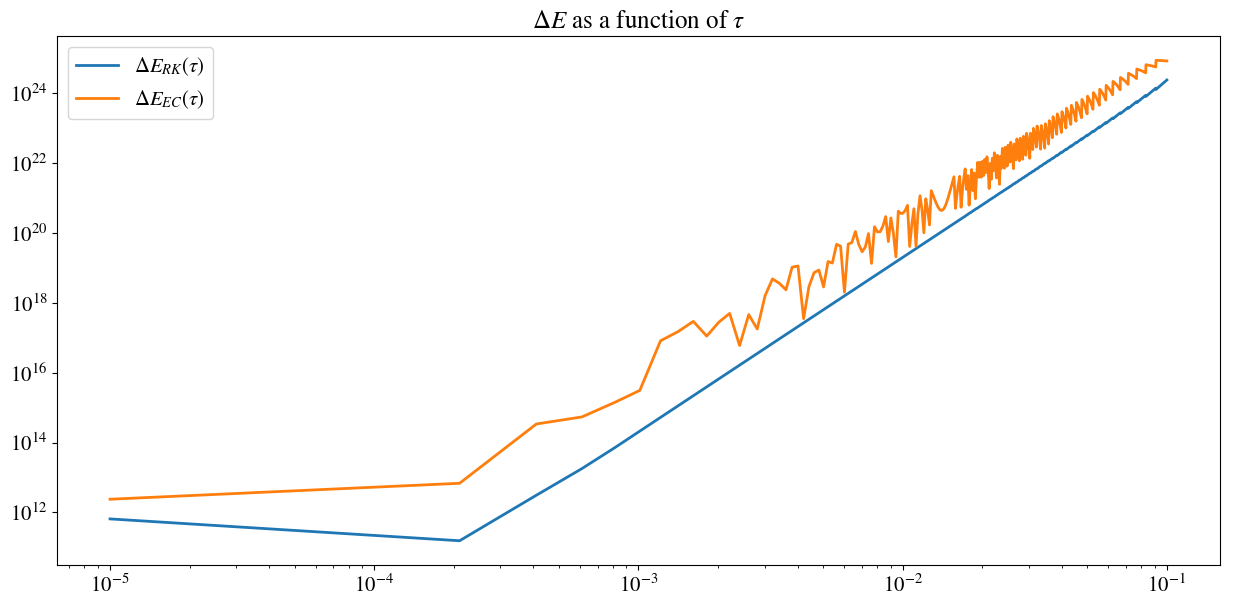

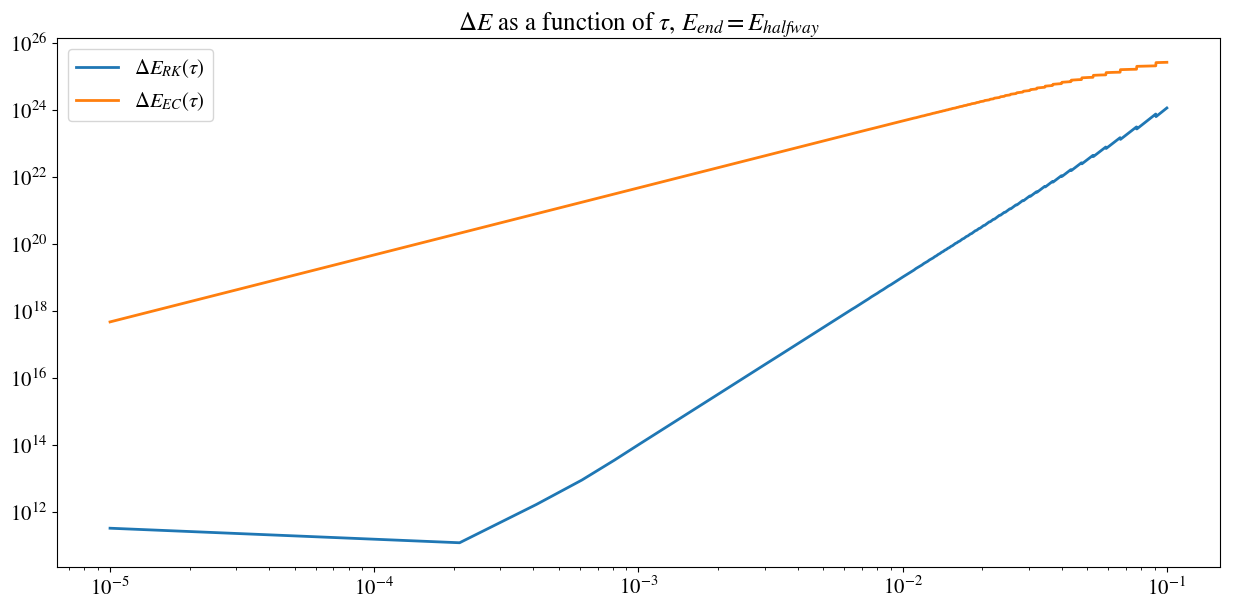

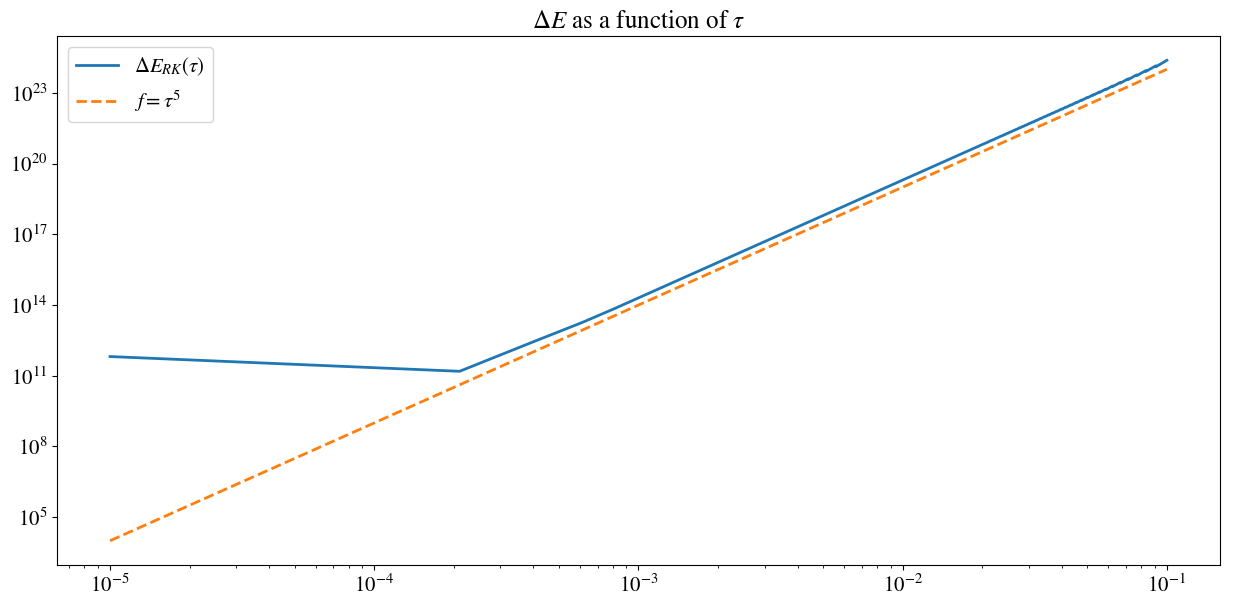

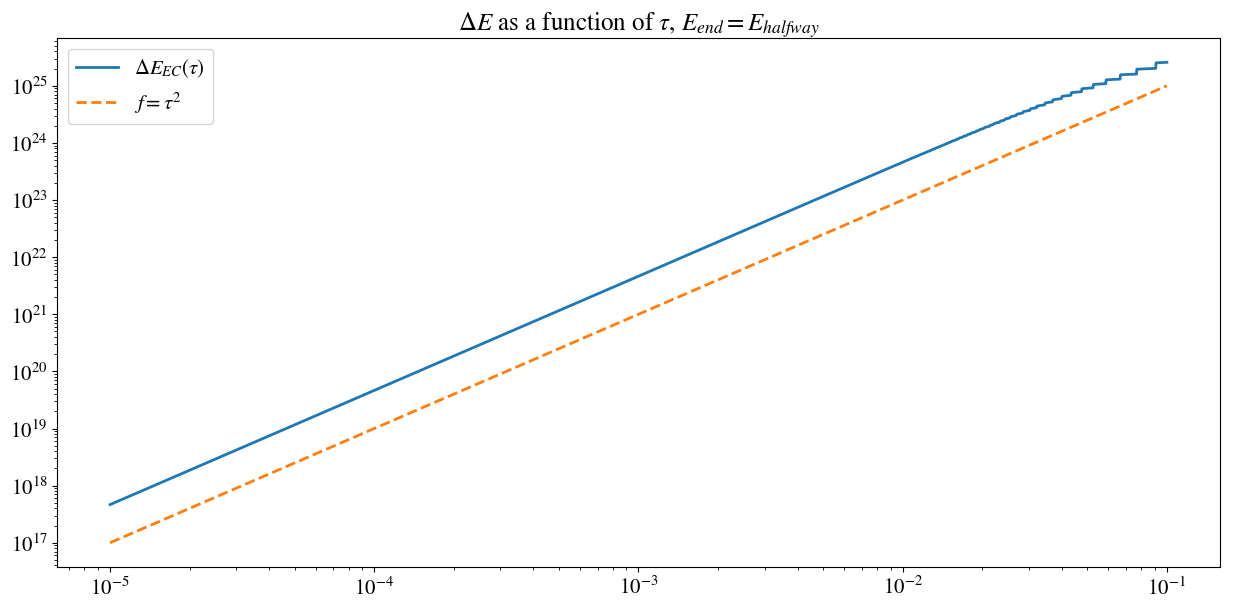

In [131]:
def get_diff_Energies(t_0, p_0, t_end, tau_array, f, method, end=True):
    diff_Energies = np.zeros(len(tau_array))
    if end:
        for i in range(len(tau_array)):
            Times, P = solve_ODE(t_0,p_0,t_end,tau_array[i],f,method)
            E_0 = 0.5*M_e*(P[0,0]**2+P[0,1]**2) - (4*M_e*np.pi**2)/np.sqrt(P[0,2]**2+P[0,3]**2)
            E_end = 0.5*M_e*(P[-1,0]**2+P[-1,1]**2) - (4*M_e*np.pi**2)/np.sqrt(P[-1,2]**2+P[-1,3]**2)
            diff_Energies[i] = abs(E_0 - E_end)
    else:
        for i in range(len(tau_array)):
            Times, P = solve_ODE(t_0,p_0,t_end,tau_array[i],f,method)
            N = int(len(P[:,0])/2)     #half-way in the orbit
            E_0 = 0.5*M_e*(P[0,0]**2+P[0,1]**2) - (4*M_e*np.pi**2)/np.sqrt(P[0,2]**2+P[0,3]**2)
            E_end = 0.5*M_e*(P[N,0]**2+P[N,1]**2) - (4*M_e*np.pi**2)/np.sqrt(P[N,2]**2+P[N,3]**2)
            diff_Energies[i] = abs(E_0 - E_end)
    return diff_Energies

tau_array = np.linspace(1e-5,1e-1,500)

Delta_E_RK = get_diff_Energies(t_0, p_0, t_end, tau_array, f, step_RK)
Delta_E_EC = get_diff_Energies(t_0, p_0, t_end, tau_array, f, step_Euler_Cromer)
plt.xscale("log")
plt.yscale("log")
plt.plot(tau_array,Delta_E_RK, label=r"$\Delta E_{RK}(\tau )$")
plt.plot(tau_array,Delta_E_EC,label=r"$\Delta E_{EC}(\tau )$")
plt.title(r"$\Delta E$ as a function of $\tau$")
plt.legend()
plt.show()

Delta_E_RK_half = get_diff_Energies(t_0, p_0, t_end, tau_array, f, step_RK, False)
Delta_E_EC_half = get_diff_Energies(t_0, p_0, t_end, tau_array, f, step_Euler_Cromer, False)
plt.xscale("log")
plt.yscale("log")
plt.plot(tau_array,Delta_E_RK_half, label=r"$\Delta E_{RK}(\tau )$")
plt.plot(tau_array,Delta_E_EC_half,label=r"$\Delta E_{EC}(\tau )$")
plt.title(r"$\Delta E$ as a function of $\tau$, $E_{end}=E_{halfway}$")
plt.legend()
plt.show()

plt.xscale("log")
plt.yscale("log")
plt.plot(tau_array,Delta_E_RK, label=r"$\Delta E_{RK}(\tau )$")
plt.plot(tau_array,(1e+29)*tau_array**5,label=r"$f= \tau ^5$",linestyle="dashed")
plt.title(r"$\Delta E$ as a function of $\tau$")
plt.legend()
plt.show()

plt.xscale("log")
plt.yscale("log")
plt.plot(tau_array,Delta_E_EC_half,label=r"$\Delta E_{EC}(\tau )$")
plt.plot(tau_array,(5e+27)*tau_array**2,label=r"$f= \tau ^2$",linestyle="dashed")
plt.title(r"$\Delta E$ as a function of $\tau$, $E_{end}=E_{halfway}$")
plt.legend()
plt.show()

By plotting $\Delta E_{EC}(\tau)$ when the error is largest for each time-step $\tau$, when $\Delta E_{EC}=E_0-E_{halfway}$ as discussed above, we see that the Euler-Cromer method is of the order $O(\tau ^2)$. 

For the Runge-Kutta method we use the ordinary $\Delta E_{RK} = E_0 - E_{end}$ because that's where the error is largest. The slope is parallel to $f=\tau ^5$, so that must be the rate of convergence.

### Kepler's third law
By setting appropiate initial contidions for each planet and using the Runge-Kutta and Euler-Cromer for half a orbit we can find the period $T$ and the semi-major axis $a$. The constant $\frac{T^2}{a^3}$ is shown below in a table for each planet and for both methods. 

The initial contidons is found the samw way as for the Earth in the first task. $v_0 = v_{0_x} = \frac{2 \pi R}{T}$ where the radius $R$ and period $T$ is found in the Appendix. 

From the table we see that Mercury is the planet that deviates the most in relation to the other planets. This is because Mercury has the largest eccentricity $\epsilon = 0.206$ and therefore does not have an approximately circular orbit. 

In [30]:
tau = 0.002
t_0 = 0

def keplers_3law(t_0, p_0, tau, f, method):
    Times = np.array([t_0])
    P = np.array([p_0])
    i = 0
    while P[-1,3] >= 0:
        Times = np.append(Times,[t_0+(i+1)*tau])
        P = np.vstack((P,method(P[i], tau, f)))
        i += 1
    period = 2*(Times[-1] - Times[0])
    a = (P[0,2] - P[-1,2])/2
    return period, a

p_0_planets = np.array([[0,2*1.62*np.pi,0.39,0],    #Mercury
                         [0,2*1.17*np.pi,0.72,0],   #Venus
                         [0,2*np.pi,1,0],           #Earth
                         [0,2*0.808*np.pi,1.52,0],  #Mars
                         [0,2*0.324*np.pi,9.54,0],  #Saturn
                         [0,2*0.228*np.pi,19.19,0], #Uranus
                         [0,2*0.182*np.pi,30.06,0]])#Neptune
planets = ["Mercury", "Venus", "Earth", "Mars", "Saturn", "Uranus", "Neptune"]
print("  List over T^2/a^3\n")
print("Planet \t   " + "EC" + "\t   " + "RK")
print("- - - - - - - - - - - - -")
for i in range(len(p_0_planets)):   ##Mangler Jupiter!!!
    period_EC, a_EC = keplers_3law(t_0, p_0_planets[i], tau, f, step_Euler_Cromer)
    period_RK, a_RK = keplers_3law(t_0, p_0_planets[i], tau, f, step_RK)
    k_EC = period_EC**2 * a_EC**(-3)
    k_RK = period_RK**2 *a_RK**(-3)
    print(planets[i] + "\t %.4f | %.4f" % (k_EC,k_RK) )


  List over T^2/a^3

Planet 	   EC	   RK
- - - - - - - - - - - - -
Mercury	 0.9631 | 1.0302
Venus	 0.9797 | 1.0068
Earth	 0.9919 | 1.0000
Mars	 0.9949 | 1.0036
Saturn	 0.9995 | 1.0001
Uranus	 0.9998 | 1.0000
Neptune	 0.9999 | 1.0000


### Perihelion of Mercury á la Einstein 

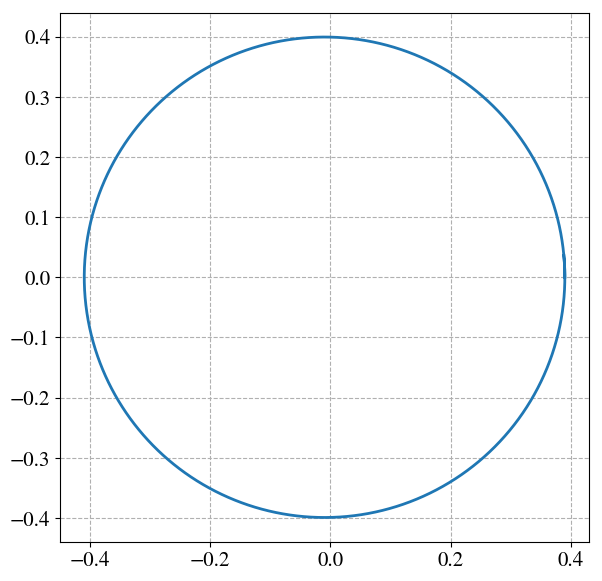

In [49]:
tau = 1e-3
t_0 = 0
t_end = 0.256  #for å få den hele veien rundt

p_0_Merc = np.array([0,2*1.62*np.pi,0.39,0])
Times_RK, P_RK = solve_ODE(t_0, p_0_Merc, t_end, tau, f, step_RK)

fig, ax = plt.subplots()
ax.set_aspect(1)
plt.plot(P_RK[:,2],P_RK[:,3], label="Traj.")
plt.grid(linestyle='--')
#plt.legend(loc='upper right')
plt.show()
